### Домашнее задание к лекции "Оценка точности модели, переобучение, регуляризация"
Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Построить график Precision - Recall на этих же данных.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [4]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
#  импортирую метод для автоматической разбивки на обучающую и тестовую выборки 
from sklearn.model_selection import train_test_split

In [10]:
# формирую набор признаков и целевую переменную
X = data[data.columns[:-1]]
y = data['affair']

In [13]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [12]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: affair, dtype: int64

In [14]:
model = LogisticRegression()

In [15]:
# разбиваю выборку и беру 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [16]:
# обучаю
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Получаю прогнозные значения модели (переменная predictions)
predictions = model.predict_proba(X_test)

In [20]:
for line in zip( predictions[:, 1], y_test ):
    print( line )

(0.3541416405475755, 0)
(0.5819083141049305, 1)
(0.2706142757387005, 0)
(0.31178096185782045, 1)
(0.5241230052420216, 0)
(0.223083479487576, 0)
(0.5224512644908397, 0)
(0.5847779961258398, 0)
(0.24955438354109796, 0)
(0.5059553523690927, 1)
(0.19403526105584917, 0)
(0.3648927041895559, 0)
(0.07638044922479865, 0)
(0.3010312612329225, 0)
(0.17275220264477786, 0)
(0.2604107806079064, 0)
(0.6267269079172143, 1)
(0.32828370042046223, 0)
(0.5133506777726802, 0)
(0.45411674181194395, 1)
(0.193707233094784, 1)
(0.3797261711332103, 0)
(0.1823196432778586, 0)
(0.2576283815335022, 0)
(0.16808027607220008, 0)
(0.19522471263744448, 0)
(0.534752917694612, 1)
(0.6163338992742586, 0)
(0.40636328229304497, 1)
(0.5059448008322123, 1)
(0.3579626642856631, 0)
(0.27305374655667186, 0)
(0.21086208537843473, 0)
(0.47593577503854445, 0)
(0.13385137112478981, 0)
(0.11949936275763488, 0)
(0.4965172854278483, 1)
(0.613415459291366, 1)
(0.08979911849691255, 0)
(0.431099271326978, 0)
(0.26003734179194865, 1)
(0.1

In [21]:
model.score(X_test, y_test)

0.7160804020100503

In [22]:
# строю набор моделей для значений random_state от 0 до 9. Получив model.score для каждого варианта.
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    print("{}: {}".format(i, model.score(X_test, y_test)))

0: 0.7324120603015075
1: 0.7292713567839196
2: 0.7185929648241206
3: 0.7204773869346733
4: 0.7123115577889447
5: 0.7267587939698492
6: 0.7154522613065326
7: 0.7361809045226131
8: 0.7116834170854272
9: 0.7154522613065326


In [23]:
# считаю accuracy последней модели
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [24]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7154522613065326

In [25]:
precision = tp / (tp + fp)
precision

0.5632911392405063

In [26]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [27]:
pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )

In [28]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.313015873015873, 1.0, 0.06728736216357052)
(0.312579415501906, 0.9979716024340771, 0.06890950765012378)
(0.31277813095994916, 0.9979716024340771, 0.06958788095471136)
(0.31297709923664124, 0.9979716024340771, 0.07060630071995562)
(0.31317632081476765, 0.9979716024340771, 0.07111520374822759)
(0.31337579617834393, 0.9979716024340771, 0.07112007454517903)
(0.3135755258126195, 0.9979716024340771, 0.0723005013517598)
(0.3137755102040816, 0.9979716024340771, 0.07377633970758628)
(0.31397574984045945, 0.9979716024340771, 0.07396076071640659)
(0.31417624521072796, 0.9979716024340771, 0.07449190353557603)
(0.31437699680511183, 0.9979716024340771, 0.07449879061154205)
(0.3145780051150895, 0.9979716024340771, 0.07452541367922443)
(0.31477927063339733, 0.9979716024340771, 0.07497486109463161)
(0.31498079385403327, 0.9979716024340771, 0.07506028282560094)
(0.3145419602818706, 0.9959432048681541, 0.07595033520999535)
(0.31474358974358974, 0.9959432048681541, 0.0760890000160158)
(0.31494547787042

In [29]:
from sklearn.metrics import average_precision_score

In [31]:
# площадь под кривой
average_precision_score( y_test, predictions[:, 1] )

0.5367416206507772

In [32]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [33]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [34]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.941966167357197)
(0.0, 0.002028397565922921, 0.9419661673571971)
(0.0, 0.02434077079107505, 0.8715030085286082)
(0.00272975432211101, 0.02434077079107505, 0.8686687444264046)
(0.00272975432211101, 0.028397565922920892, 0.8656105681708082)
(0.00545950864422202, 0.028397565922920892, 0.8535789696669119)
(0.00545950864422202, 0.034482758620689655, 0.8337692696373433)
(0.006369426751592357, 0.034482758620689655, 0.8329025747020786)
(0.006369426751592357, 0.04665314401622718, 0.8228053252036306)
(0.00818926296633303, 0.04665314401622718, 0.819133784400481)
(0.00818926296633303, 0.05070993914807302, 0.8167243357304989)
(0.010009099181073703, 0.05070993914807302, 0.8111731204349777)
(0.010009099181073703, 0.05273833671399594, 0.8100512837429127)
(0.01091901728844404, 0.05273833671399594, 0.806018747840232)
(0.01091901728844404, 0.05476673427991886, 0.8049704587140982)
(0.011828935395814377, 0.05476673427991886, 0.8048577500428981)
(0.011828935395814377, 0.056795131845841784, 0.79

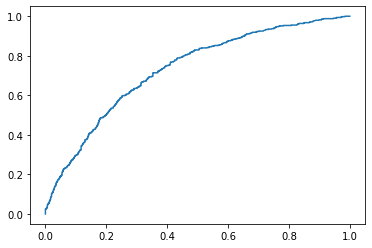

In [37]:
plt.plot( fpr, tpr )

In [40]:
# строю еще одну модель с ограниченным количеством признаков
Xshort = X.loc[ :, ['yrs_married', 'children'] ]
Xshort.head()

,yrs_married,children
0,9.0,3.0
1,13.0,3.0
2,2.5,0.0
3,16.5,4.0
4,9.0,1.0


In [41]:
model_short = LogisticRegression()

In [42]:
X_train_short, X_test_short, y_train, y_test = train_test_split( Xshort, y, test_size = 0.25, random_state = 42 )

In [44]:
model_short.fit( X_train_short, y_train )

LogisticRegression()

In [45]:
predictions_short = model_short.predict_proba( X_test_short )

In [47]:
fpr2, tpr2, thres2 = roc_curve( y_test, predictions_short[:, 1] )

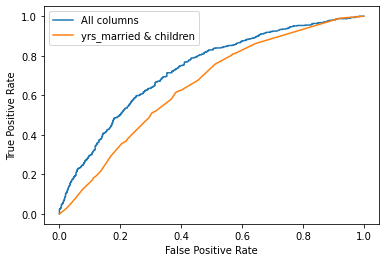

In [49]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'yrs_married & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

In [50]:
# посчитаю площадь под ROC-кривой для двух моделей
from sklearn.metrics import roc_curve

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
roc_auc_score( y_test, predictions[:, 1] )

0.4909626060172805

In [53]:
roc_auc_score( y_test, predictions_short[:, 1] )

0.6500472168533277

In [54]:
# посчитаю с помощью метода AUC
from sklearn.metrics import auc

In [55]:
auc( fpr, tpr )

0.7304399906239677

In [56]:
auc( fpr2, tpr2 )

0.6500472168533277

In [68]:
# precision recall curve

In [63]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

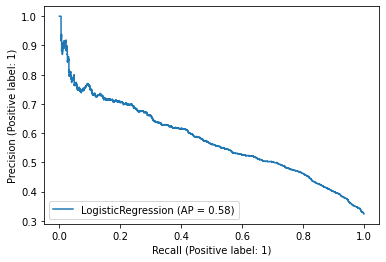

In [65]:
plot_precision_recall_curve(model, X, y) 
plt.show() 

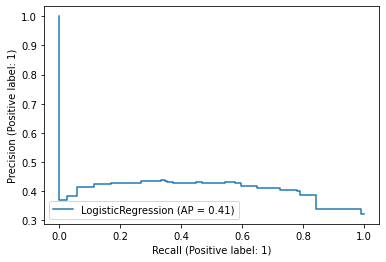

In [67]:
plot_precision_recall_curve(model_short, Xshort, y) 
plt.show() 